# Scraping Historical Data

In [227]:
import pandas as pd
import matplotlib
import numpy as np
from bs4 import BeautifulSoup
import requests
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
URL = 'https://finance.yahoo.com/quote/%5EGSPC/history/?frequency=1mo&period1=-1325583000&period2=1720977792'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"}

In [182]:
page = requests.get(URL, headers = headers)
soup = BeautifulSoup(page.text, 'html')
soup = BeautifulSoup(soup.prettify(), 'html')

### Extracting the header columns of the table

In [204]:
head=[]
Titles = soup.find_all('th',class_ = 'svelte-ewueuo')
for title in Titles[:4] :
    temp = title.text.split()
    head.append(temp[0])

Titles = soup.find_all('th',class_ = 'svelte-ewueuo')[4]
Titles = Titles.text.strip().split('\n')
Titles=Titles[0]
head.append(Titles)

Titles = soup.find_all('th',class_ = 'svelte-ewueuo')[5]
Titles = Titles.text.strip().split('\n')
Titles=Titles[0]
head.append(Titles)

Titles = soup.find_all('th',class_ = 'svelte-ewueuo')[6]
Titles = Titles.text.strip().split('\n')
Titles=Titles[0]
head.append(Titles)


In [218]:
head

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

### Extracting the row data

In [219]:
row_list = []

In [220]:
index = 2  # Starting index

while True:
    rows = soup.find_all('tr', class_='svelte-ewueuo')
    
    if index < len(rows):
        row = rows[index].text.strip()
        clean_rows = [row.strip() for row in row.split('\n\n') if row.strip()]
        if not clean_rows:
            break
        row_list.append(clean_rows)
        index += 1
    else:
        break


In [221]:
df = pd.DataFrame(row_list,columns = head)

#### We have the table, but we do not have the desired data types required for table manipulation 

In [222]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jun 1, 2024","5,297.15","5,523.64","5,234.32","5,460.48","5,460.48","76,025,620,000"
1,"May 1, 2024","5,029.03","5,341.88","5,011.05","5,277.51","5,277.51","86,849,720,000"
2,"Apr 1, 2024","5,257.97","5,263.95","4,953.56","5,035.69","5,035.69","81,747,170,000"
3,"Mar 1, 2024","5,098.51","5,264.85","5,056.82","5,254.35","5,254.35","86,299,510,000"
4,"Feb 1, 2024","4,861.11","5,111.06","4,853.52","5,096.27","5,096.27","82,066,930,000"
...,...,...,...,...,...,...,...
469,"May 1, 1985",179.83,189.98,178.35,189.55,189.55,"2,350,340,000"
470,"Apr 1, 1985",180.66,183.61,177.86,179.83,179.83,"1,981,880,000"
471,"Mar 1, 1985",181.18,183.89,176.53,180.66,180.66,"2,153,090,000"
472,"Feb 1, 1985",179.63,183.95,177.75,181.18,181.18,"2,194,620,000"


In [223]:
df.dtypes

Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
dtype: object

In [224]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [225]:
for col in columns_to_float:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

df['Volume'] = df['Volume'].astype(str).str.replace(',', '').astype('Int64')

df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-06-01,5297.15,5523.64,5234.32,5460.48,5460.48,76025620000
1,2024-05-01,5029.03,5341.88,5011.05,5277.51,5277.51,86849720000
2,2024-04-01,5257.97,5263.95,4953.56,5035.69,5035.69,81747170000
3,2024-03-01,5098.51,5264.85,5056.82,5254.35,5254.35,86299510000
4,2024-02-01,4861.11,5111.06,4853.52,5096.27,5096.27,82066930000
...,...,...,...,...,...,...,...
469,1985-05-01,179.83,189.98,178.35,189.55,189.55,2350340000
470,1985-04-01,180.66,183.61,177.86,179.83,179.83,1981880000
471,1985-03-01,181.18,183.89,176.53,180.66,180.66,2153090000
472,1985-02-01,179.63,183.95,177.75,181.18,181.18,2194620000


In [ ]:
df

In [237]:
page = requests.get(URL, headers = headers)
soup = BeautifulSoup(page.text, 'html')
soup = BeautifulSoup(soup.prettify(), 'html')

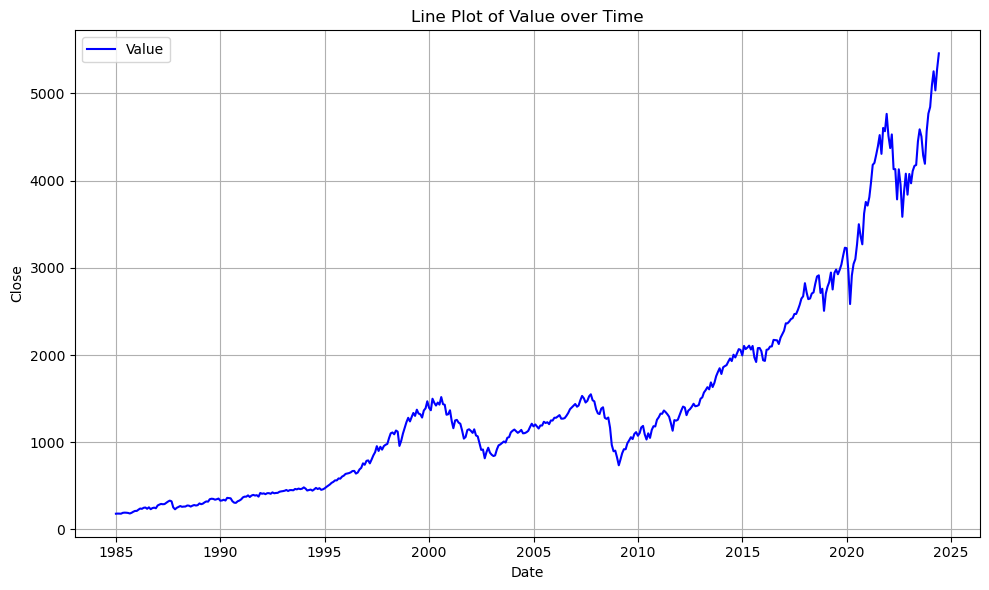

In [236]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], linestyle='-', color='b', label='Value')
plt.title('Line Plot of Value over Time')
plt.xlabel('Date')
plt.ylabel('Close $')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()